In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import cdist to find distance for creating circle for each cluster
from scipy.spatial.distance import cdist

# SK-learn libraries for learning.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## Import Data

In [2]:
cleaned_df=pd.read_csv('cleaned_wildfire_data.csv').drop(['Unnamed: 0','_id','Event'],axis=1)
cleaned_df.head()

,Latitude,Longitude,Size,log_sizes,size_category,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.6681,-117.50139,100.0,4.605170,class_d,48.221250,52.325833,55.353750,52.667083,48.797917,...,3.646667,2.427500,4.275833,1.949583,2.096250,1.935833,1.428750,2.269583,1.633333,1.618333
1,33.0333,-116.83389,25.0,3.218876,class_c,48.305833,46.069583,44.835417,39.776667,37.474167,...,1.526667,1.640417,1.833333,5.261250,4.941250,1.846250,2.011250,7.476250,5.292083,2.992083
2,37.3683,-118.35833,840.0,6.733402,class_e,40.872500,41.335833,49.464583,50.744583,55.579167,...,3.337500,2.846250,5.654583,4.394583,2.933750,2.271250,2.413333,2.819167,5.687500,6.950417
3,33.8692,-117.68361,892.0,6.793466,class_e,55.987500,59.727083,60.797917,62.654167,64.841250,...,5.224583,4.270417,2.530000,4.327917,5.611250,3.257917,3.257083,3.121667,2.863750,2.850417
4,32.8689,-116.86667,15.0,2.708050,class_c,54.468750,53.435833,55.019167,58.447083,62.486667,...,3.899167,4.002500,3.761667,6.027083,3.868333,2.800000,3.557500,3.774583,4.250417,3.922083


In [3]:
#Split data into X's (features) and Y's (labels)
X= cleaned_df.drop(columns='size_category')
y= cleaned_df['size_category']

In [4]:
len(X)

681

In [5]:
len(y)

681

In [6]:
train_d, dev_d, test_d = np.split(X.sample(frac=1, random_state=42), [int(.6*len(X)), int(.8*len(X))])


In [7]:
train_d.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
648,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
296,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
63,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
320,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
101,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


In [8]:
train_l, dev_l, test_l = np.split(y.sample(frac=1, random_state=42), [int(.6*len(y)), int(.8*len(y))])


In [9]:
train_l.head()

648    class_d
296    class_f
63     class_d
320    class_g
101    class_d
Name: size_category, dtype: object

In [10]:
train_data = train_d.reset_index(drop=True)
test_data = test_d.reset_index(drop=True)
train_labels = train_l.reset_index(drop=True)
test_labels = test_l.reset_index(drop=True)
dev_data = dev_d.reset_index(drop=True)
dev_labels = dev_l.reset_index(drop=True)

In [11]:
train_data.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
1,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
2,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
3,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
4,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


Model:\
1) Naive Bayes (Pan)\
    -Bernoulli
    -Multinomial
2) k-nn & K-means (Pauline)
3) Gaussian and PCA (Hannah)
4) Logistic Regression (Cisco)
5) Linear Regression (Josh) (optional)



## Naive Bayes (Pan)

## K-Nearest-Neighbors (Pauline)

Producing a k-Nearest-Neighbords model with various k values. Evaluating the performance of the model with a classification report. 

In [12]:
k_values = [1,3,5,10, 25, 50, 75, 100]

#add scores for each k_value
scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(train_data, train_labels)
    score = model.score(dev_data, dev_labels)
    scores.append(score)
percent = (np.array(scores)*100)

#go through each k_value to fit the model
test_predicted_labels = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(train_data, train_labels)
    test_predicted_labels.append(model.predict(dev_data))

#creating a table to easily visualize K value to corresponding score
kdf = {'K Values': k_values, 'Scores': percent}
kdft = pd.DataFrame(kdf, columns = ['K Values', 'Scores'])
#sorting the table by highest scores
kdft.sort_values(by = 'Scores', ascending=False)

,K Values,Scores
2,5,94.117647
0,1,91.911765
1,3,91.911765
3,10,91.176471
4,25,90.441176
5,50,85.294118
6,75,73.529412
7,100,63.235294


In [13]:
#create classifcation report for 5-Nearest Neighbor (the one that produced the highest score)
model1 = KNeighborsClassifier(n_neighbors =5)
model1.fit(train_data, train_labels)
print(classification_report(dev_labels, model1.predict(dev_data)))


              precision    recall  f1-score   support

     class_b       1.00      0.50      0.67         8
     class_c       0.90      0.96      0.93        48
     class_d       0.93      0.96      0.94        26
     class_e       1.00      1.00      1.00        21
     class_f       0.95      1.00      0.97        18
     class_g       1.00      0.93      0.97        15

    accuracy                           0.94       136
   macro avg       0.96      0.89      0.91       136
weighted avg       0.94      0.94      0.94       136



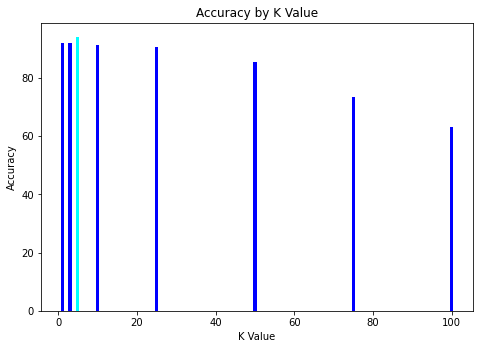

In [18]:
#Bar plot to further visualize the K Value and corresponding scores
width = 0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
percent = np.array(scores) * 100
ax.bar(k_values, percent, color=('blue','blue', 'cyan','blue','blue','blue', 'blue'))
ax.set_ylabel('Accuracy')
ax.set_xlabel('K Value')
ax.set_title('Accuracy by K Value')
plt.show()

The K-Nearest Neighbor value of 5 produces the highest score of 94.1%

## K Means (Pauline)

In [53]:
X.shape

(681, 178)

In [19]:
#array of different clusters for kmeans
n_clusters = [1, 3, 5, 7, 10]
random_state = 10

In [41]:
#create model with 7 clusters 
#because there are 7 different size categories of the fire 
kmeans = KMeans(n_clusters = 7, random_state = random_state)

#fit the model 
kmeans.fit(train_data)

# predict cluster
clusters = kmeans.predict(train_data)

#centroids 
centroids = km_model.cluster_centers_

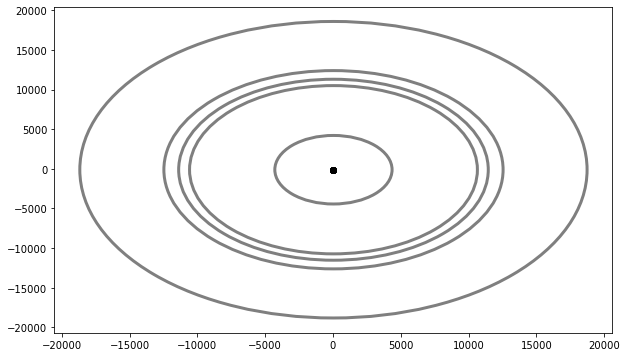

In [51]:
#making kmeans for 7 clusters
kmeans = KMeans(n_clusters=7)
kmeans.fit(train_data)
ymeans = kmeans.predict(train_data)
fig, ax = plt.subplots(1, figsize=(10, 6))

#creating an array to find x values of centroids 
centers = kmeans.cluster_centers_
x_centers = []
for i in range(0,7):
    x = centers[i][0]
    x_centers.append(x)
#creating an array to find y values of centroids 
y_centers = []
for i in range(0,7):
    y = centers[i][1]
    y_centers.append(y)

#plotting the centers of the clusters 
ax.scatter(x_centers, y_centers, color = 'black')

#creating circles for each cluster 
for i in range(7):
    radii = cdist(train_data[kmeans.labels_ == i],
                  [kmeans.cluster_centers_[i]]).max()
    ax.add_patch(plt.Circle(kmeans.cluster_centers_[i], radii, 
                        fc='#CCCCCC', lw=3, alpha=0.5, ec = 'black', fill=False))
plt.show()

## Gaussian and PCA (Hannah)

## Logistic Regression (Cisco)

## Linear Regression (Josh) 